<a href="https://colab.research.google.com/github/DeepanjanSaha-INDIA/Neural_Network_MNIST_Dataset/blob/master/Digits_classifier_ANN_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist

%matplotlib inline

print(tf.__version__)

2.2.0-rc2


# Loading Dataset

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


# Displaying a training set image

5


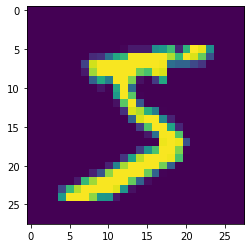

In [23]:
print(y_train[0])
plt.imshow(x_train[0])

# Dataset Preprocessing

## Reshaping the dataset

In [0]:
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

## Normalisation of Dataset

In [0]:
x_train = x_train/255
x_test = x_test/255

# Building Artificial Neural Network

## Defining model

In [0]:
model = tf.keras.models.Sequential()

## Adding layers

In [0]:
model.add(tf.keras.layers.Dense(units= 128, activation= tf.keras.activations.relu, input_shape = (784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 10, activation= tf.keras.activations.softmax))

## Compiling model

In [0]:
model.compile(optimizer= "adam", loss= 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Training model

In [30]:
model.fit(x = x_train, y = y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2937 - sparse_categorical_accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1442 - sparse_categorical_accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1080 - sparse_categorical_accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0873 - sparse_categorical_accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0737 - sparse_categorical_accuracy: 0.9756


# Manual testing

(array([618.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          3.,   0.,   0.,   1.,   0.,   2.,   0.,   5.,   0.,   0.,   0.,
          0.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

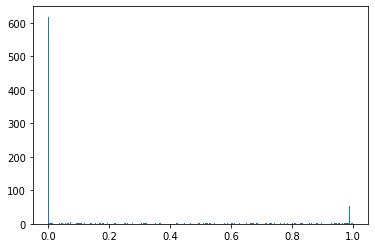

In [39]:
plt.hist(x_train[0], bins = 256)

In [40]:
arr = np.zeros((x_train[0].shape))
arr[x_train[0] > 0.8] = 1
print(np.unique(arr, return_counts= True))

(array([0., 1.]), array([705,  79]))


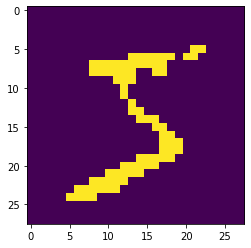

In [42]:
plt.imshow(arr.reshape((28,28)))

In [44]:
model.predict(x= np.array([arr]))

array([[2.64242828e-09, 2.40520137e-07, 1.53099554e-05, 3.78187180e-01,
        1.06221055e-16, 6.21796012e-01, 1.53871655e-11, 2.10084707e-07,
        1.94731092e-10, 9.83856353e-07]], dtype=float32)

# Model evaluation and prediction

In [31]:
loss, accuracy = model.evaluate(x = x_test, y = y_test)

313/313 [==============================] - 0s 938us/step - loss: 0.0764 - sparse_categorical_accuracy: 0.9766


In [32]:
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9765999913215637


# Saving the model

In [0]:
model.save("digits_trained_ANN.h5")